In [4]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.datasets as datasets

In [7]:
digits = datasets.load_digits()

data = digits.data
target = digits.target

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import KFold

In [ ]:
train_test_split(data,target,test_size=0.1)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [17]:
# 交叉验证
# 默认把训练集拆分成3份，结果就是每一种拆分组合获得的评分情况
# cross_val_score(knn,data,target)

# 预测的结果是对所有训练集的对象进行预测
cross_val_predict(knn,data,target)

array([0, 1, 8, ..., 8, 9, 8])

In [21]:
# 自定制拆分数据集的个数
kfold = KFold(n_splits=10)
# 使用交叉验证函数按照自定制的拆分格式进行验证
results = cross_val_score(knn,data,target,cv=kfold)
print(results,results.mean())

[0.92777778 0.98888889 0.98888889 0.97777778 0.96111111 0.97777778
 0.98888889 0.98324022 0.98324022 0.96089385] 0.9738485412787089


In [22]:
# 可选的分类算法
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [24]:
logistic = LogisticRegression()
tree = DecisionTreeClassifier()
gaussion = GaussianNB()
svc = SVC(kernel='linear')

In [28]:
# 交叉验证，查看算法评分最高的是哪个
results1 = cross_val_score(logistic,data,target,cv=kfold)
print(results1,results1.mean())

[0.90555556 0.95       0.89444444 0.91666667 0.94444444 0.97222222
 0.97777778 0.95530726 0.8603352  0.93854749] 0.931530105524519


In [45]:
def cross_score_10(model,data,target):
    kfold = KFold(n_splits=10)
    results = cross_val_score(model,data,target,cv=kfold)
    print("%s 的平均分值是 %f" % (model.__class__.__name__,results.mean()))

In [30]:
cross_score_10(logistic,data,target)

LogisticRegression 的平均分值是 0.93


In [31]:
cross_score_10(knn,data,target)

KNeighborsClassifier 的平均分值是 0.97


In [32]:
cross_score_10(tree,data,target)

DecisionTreeClassifier 的平均分值是 0.83


In [33]:
cross_score_10(gaussion,data,target)

GaussianNB 的平均分值是 0.81


In [34]:
cross_score_10(svc,data,target)

SVC 的平均分值是 0.96


In [36]:
# 算法调参，需要调节knn和svc算法的参数

# knn n_neighbors
# svc kernal C gamma

In [53]:
svc = SVC(kernel='linear',C=100000,gamma=0.1)
cross_score_10(svc,data,target)

SVC 的平均分值是 0.963827


In [59]:
knn = KNeighborsClassifier(n_neighbors=3)
cross_score_10(knn,data,target)

KNeighborsClassifier 的平均分值是 0.977188


In [60]:
# 使用GridSearchCV自动调参 网格验证
from sklearn.model_selection import GridSearchCV

In [62]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [63]:
# 网格搜索最优算法参数
paramas = {'n_neighbors':[x for x in range(1,10)]}
clf = GridSearchCV(knn,param_grid=paramas)

In [67]:
# clf就是自动调整为最优参数的knn模型对象
clf.fit(data,target)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [68]:
# 获取最优的算法参数
clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [69]:
cross_score_10(clf,data,target)

GridSearchCV 的平均分值是 0.978299


In [78]:
svc = SVC()
paramas = {
    'kernel':('linear','rbf'),
    'C':[0.001,0.005,0.1,1,10,100,1000],
    'gamma':[0.01,0.1,1,10,100,100,10000]
}
clf1 = GridSearchCV(svc,param_grid=paramas)
clf1.fit(data,target)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [0.001, 0.005, 0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.1, 1, 10, 100, 100, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [79]:
clf1.best_estimator_

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [89]:
# 模型调优、分数、选择结束
# 最终确定了机器学习模型
# 训练最优解的模型
cross_score_10(clf1.best_estimator_,data,target)

SVC 的平均分值是 0.962706


完整逻辑如下

In [82]:
# 预测并展示结果
# 是否需要拆分样本矩为train,test
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.1)

In [92]:
logistic = LogisticRegression()
tree = DecisionTreeClassifier()
gaussion = GaussianNB()
svc = SVC(kernel='linear')
knn = KNeighborsClassifier()

# 跑分（拆分训练集）找最优算法（打分是否稳定，分数是否更高）
cross_score_10(knn,X_train,y_train)


# 得到结论 knn svc 是可用的算法

# 分别knn、svc 算法调优（调参）
paramas = {'n_neighbors':[x for x in range(1,10)]}

# clf对象就是最优算法对象（最优秀参数）
clf = GridSearchCV(knn,param_grid=paramas)

# 比较一下knn\svc谁更高、更快、更强
# knn是最好的
# cross_score_10(clf,X_train,y_train)
# cross_score_10(clf1,X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [97]:
# 使用最优解训练数据集
%time clf.best_estimator_.fit(X_train,y_train)

# 预测数据
y_ = clf.best_estimator_.predict(X_test)

Wall time: 8.02 ms


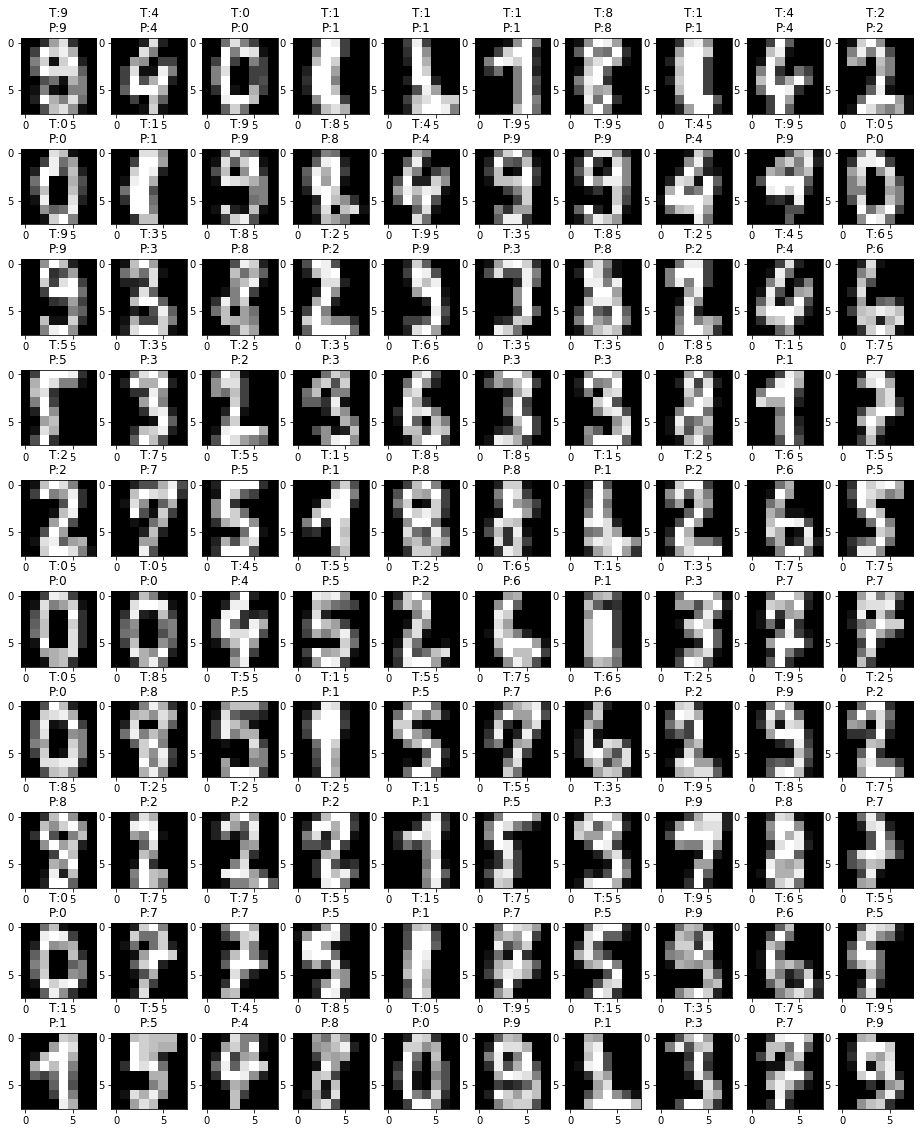

In [107]:
# 展示结果
plt.figure(figsize=(16,20))
for i in range(100):
    axes = plt.subplot(10,10,i+1)
    data = X_test[i].reshape(8,8)
    plt.imshow(data,cmap='gray')
    t = y_test[i]
    p = y_[i]
    title = 'T:'+str(t) + '\nP:'+str(p)
    axes.set_title(title)

In [109]:
clf.best_estimator_.score(X_test,y_test)

0.9944444444444445